# RANDOM FOREST ASSIGNMENT | Credit Risk Classification Dataset

## Introduction of the Dataset

The Credit Risk Classification Dataset is designed to help build predictive models for assessing the risk associated with credit customers. This dataset is divided into two CSV files: payment_data and customer_data. Each file contains various attributes that can be used to evaluate and classify credit risk.

1. payment_data CSV
The payment_data CSV contains information related to the payment history and credit usage of customers. It includes 12 columns and 8250 entries. The columns provide details such as overdue payments, product codes, credit limits, and balances.

- id: Unique identifier for each customer.
- OVD_t1, OVD_t2, OVD_t3: Overdue payments at different time periods.
- OVD_sum: Sum of overdue payments.
- pay_normal: Indicator of normal payment status.
- prod_code: Product code associated with the credit.
- prod_limit: Credit limit for the product.
- update_date: Last update date for the record.
- new_balance: Current balance.
- highest_balance: Highest balance recorded.
- report_date: Date of the report.


2. customer_data CSV
The customer_data CSV provides demographic and feature data for the customers, which can be used to understand customer behavior and characteristics. It consists of 13 columns and 1125 entries.

- label: Target variable indicating credit risk status (e.g., 1 for high risk, 0 for low risk).
- id: Unique identifier matching with payment_data.
- fea_1 to fea_11: Feature columns representing various customer attributes such as demographic information and behavior patterns.

## Import Libraries

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the payment_data dataset

In [72]:
payment_df = pd.read_csv("C:\Ozy\Data Science\DS datasets\payment_data.csv")
payment_df.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04-12-2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04-12-2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04-12-2016,840000.0,700500.0,22-04-2016
3,54988608,0,0,0,0,3,10,37400.0,03-12-2016,8425.2,7520.0,25-04-2016
4,54987763,0,0,0,0,2,10,NaN,03-12-2016,15147.6,NaN,26-04-2016


## Load the customer_data dataset

In [73]:
customer_df = pd.read_csv("C:\Ozy\Data Science\DS datasets\customer_data.csv")
customer_df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


## Basic Information of payment_df dataset

In [74]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


## Basic Information of customer_df dataset

In [75]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


## Summary of the payment_df dataset

In [76]:
payment_df.describe()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


## Summary of the customer_df dataset

In [77]:
customer_df.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


## Checking Missing values in payment_df DataFrame

In [78]:
payment_df.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

## Checking Missing values in customer_df DataFrame

In [79]:
customer_df.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

## Handle Missing Values in payment_df

In [80]:
# Fill missing 'prod_limit' with median
payment_df['prod_limit'].fillna(payment_df['prod_limit'].median(), inplace=True)

# Fill missing 'highest_balance' with median
payment_df['highest_balance'].fillna(payment_df['highest_balance'].median(), inplace=True)

# Fill missing dates with mode (most frequent date)
payment_df['update_date'].fillna(payment_df['update_date'].mode()[0], inplace=True)
payment_df['report_date'].fillna(payment_df['report_date'].mode()[0], inplace=True)

payment_df.isnull().sum()

id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
prod_limit         0
update_date        0
new_balance        0
highest_balance    0
report_date        0
dtype: int64

## Handle Missing Values in customer_df

In [81]:
# Fill missing 'fea_2' with median
customer_df['fea_2'].fillna(customer_df['fea_2'].median(), inplace=True)

customer_df.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

## Visualizations for payment_df

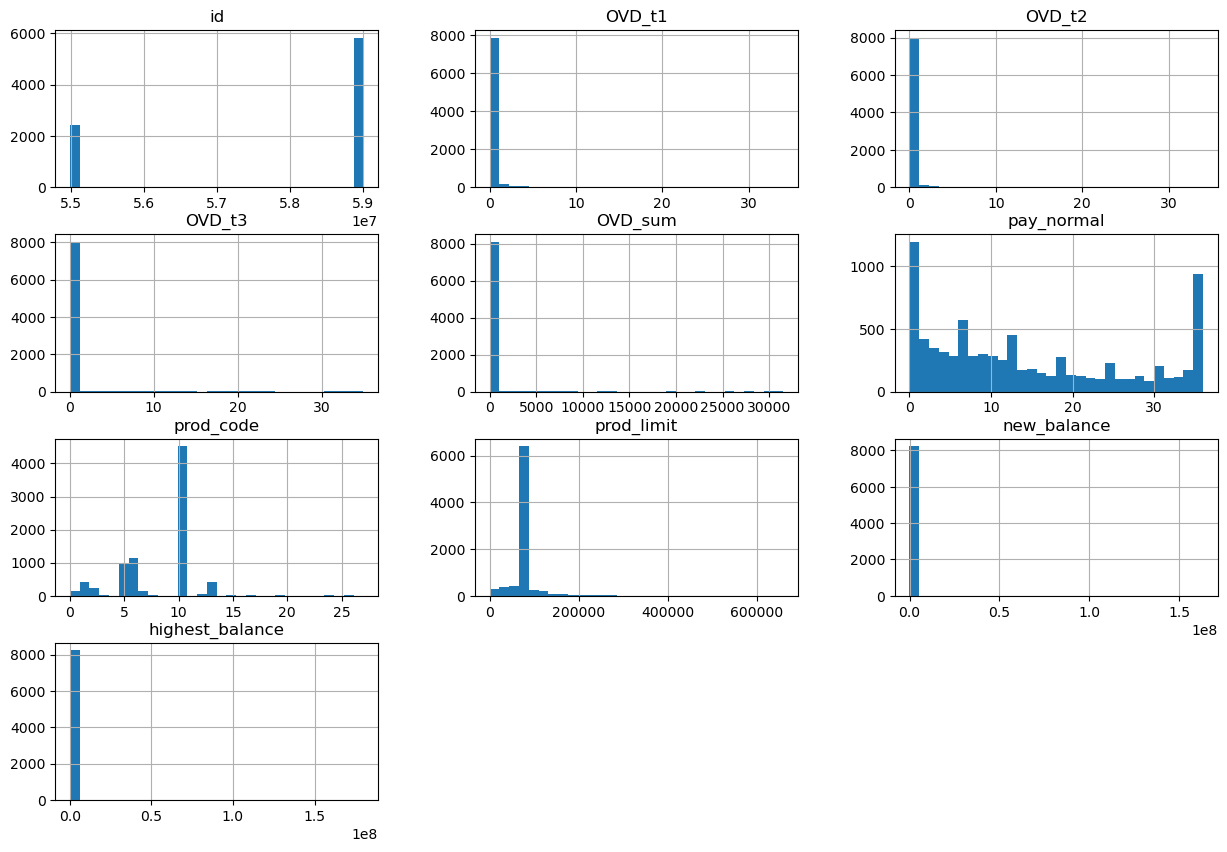

In [82]:
# Histograms
payment_df.hist(bins=30, figsize=(15, 10))
plt.show()

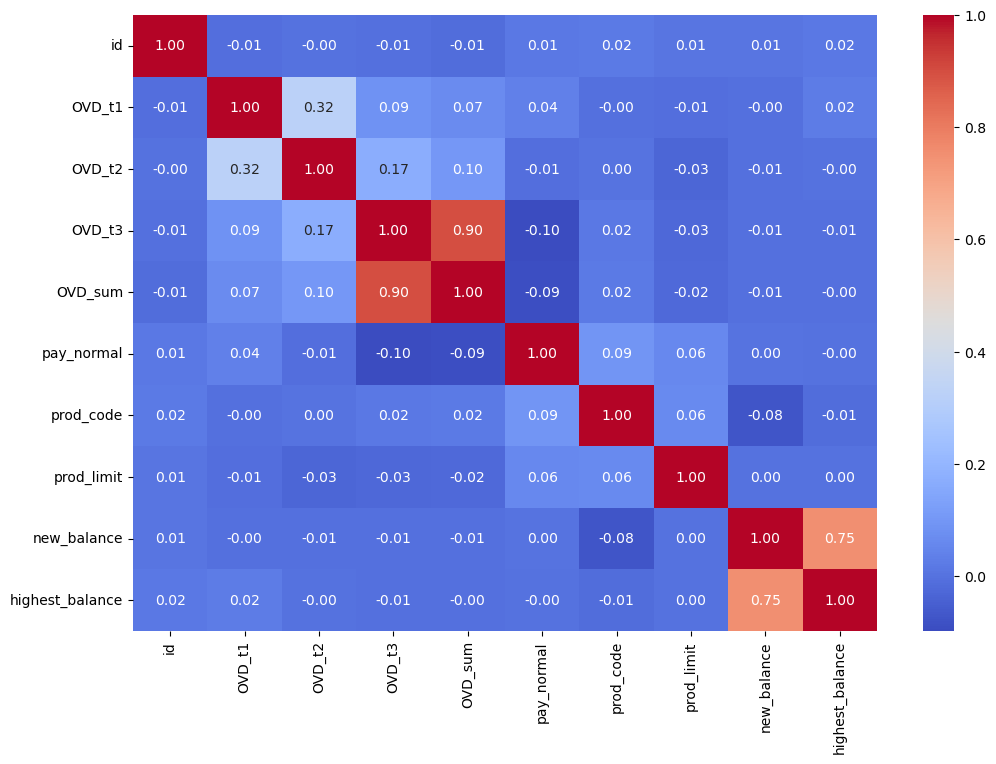

In [83]:
# Dropping 'update_date' and 'report_date' columns
df_corr = payment_df.drop(columns=['update_date', 'report_date']).corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- Histograms: Display the distribution of numeric features, indicating any skewness or outliers.
- Correlation Matrix: Shows the relationships between numeric variables. High correlations may indicate multicollinearity.

## Visualizations for customer_df

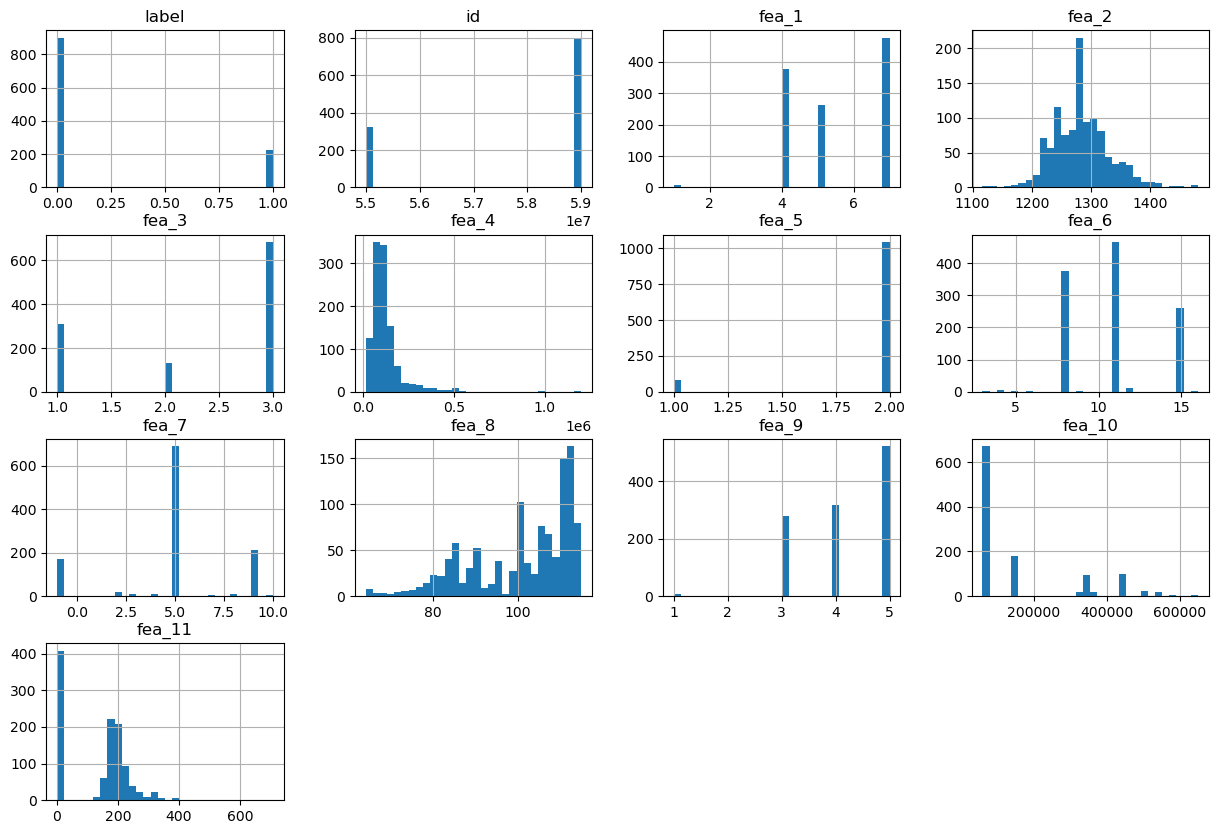

In [84]:
customer_df.hist(bins=30, figsize=(15, 10))
plt.show()

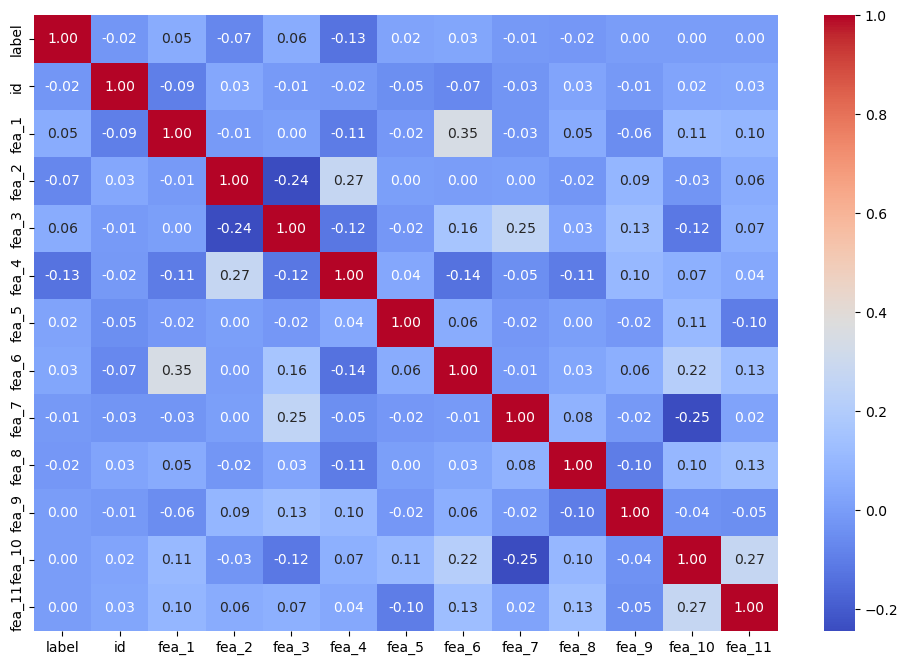

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- Histograms: Help visualize the distribution of each feature.
- Correlation Matrix: Indicates the strength and direction of relationships between features.

## Merge both the payment_df & customer_df Datasets

In [86]:
merged_df = pd.merge(payment_df, customer_df, on='id')

## Convert Date Columns to Datetime

In [87]:
merged_df['update_date'] = pd.to_datetime(merged_df['update_date'], dayfirst=True)
merged_df['report_date'] = pd.to_datetime(merged_df['report_date'], dayfirst=True)

## Feature Engineering

In [88]:
# Time difference between update_date and report_date.
merged_df['date_diff'] = (merged_df['update_date'] - merged_df['report_date']).dt.days
merged_df

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,date_diff
0,58987402,0,0,0,0,1,10,16500.0,2016-12-04,0.0,...,3,62000.0,2,15,9,95,4,60023,1.0,440
1,58987402,0,0,0,0,1,0,68200.0,2016-10-04,42000.0,...,3,62000.0,2,15,9,95,4,60023,1.0,379
2,58987402,0,0,0,0,2,10,113300.0,2016-02-13,7938.0,...,3,62000.0,2,15,9,95,4,60023,1.0,-40
3,58987402,0,0,0,0,9,10,68200.0,2015-07-27,30039.6,...,3,62000.0,2,15,9,95,4,60023,1.0,-374
4,58987402,0,0,0,0,1,0,68200.0,2011-12-07,0.0,...,3,62000.0,2,15,9,95,4,60023,1.0,-1384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58982397,1,0,0,30,34,10,68200.0,2006-01-13,0.0,...,1,500000.0,2,4,9,105,5,650005,1.0,-1199
8246,58982397,0,0,0,0,1,10,68200.0,2004-12-20,-1.2,...,1,500000.0,2,4,9,105,5,650005,1.0,-472
8247,58982397,0,0,0,0,23,10,205700.0,2004-05-06,0.0,...,1,500000.0,2,4,9,105,5,650005,1.0,-3173
8248,58982397,0,0,0,0,3,10,68200.0,2003-10-25,0.0,...,1,500000.0,2,4,9,105,5,650005,1.0,-512


## Standardization

In [89]:
from sklearn.preprocessing import StandardScaler

# Create numeric features from dates
merged_df['update_date_num'] = (merged_df['update_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
merged_df['report_date_num'] = (merged_df['report_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Drop original date columns and any columns not needed for modeling
X = merged_df.drop(['label', 'id', 'update_date', 'report_date'], axis=1)

# Handle missing values in the remaining columns
X.fillna(X.median(), inplace=True)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Create DataFrame for scaled features
X_scaled = pd.DataFrame(scaled_features, columns=X.columns)
y = merged_df['label']

In [90]:
X_scaled

,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,fea_1,...,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,date_diff,update_date_num,report_date_num
0,-0.199253,-0.147852,-0.127308,-0.104029,-1.122275,0.500447,-1.458584,-0.055841,-0.060668,-0.376487,...,0.25074,1.479361,1.358606,-0.400843,-0.279871,-0.769679,-1.245386,1.259576,1.293470,0.441703
1,-0.199253,-0.147852,-0.127308,-0.104029,-1.122275,-2.330136,-0.117878,-0.033590,-0.063783,-0.376487,...,0.25074,1.479361,1.358606,-0.400843,-0.279871,-0.769679,-1.245386,1.203083,1.248455,0.441703
2,-0.199253,-0.147852,-0.127308,-0.104029,-1.039308,0.500447,1.051673,-0.051635,-0.074128,-0.376487,...,0.25074,1.479361,1.358606,-0.400843,-0.279871,-0.769679,-1.245386,0.815038,1.075777,0.649760
3,-0.199253,-0.147852,-0.127308,-0.104029,-0.458534,0.500447,-0.117878,-0.039926,-0.059206,-0.376487,...,0.25074,1.479361,1.358606,-0.400843,-0.279871,-0.769679,-1.245386,0.505714,0.927451,0.799336
4,-0.199253,-0.147852,-0.127308,-0.104029,-1.122275,-2.330136,-0.117878,-0.055841,-0.021873,-0.376487,...,0.25074,1.479361,1.358606,-0.400843,-0.279871,-0.769679,-1.245386,-0.429668,-0.052535,0.441703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0.600669,-0.147852,-0.127308,-0.087401,1.615656,0.500447,-0.117878,-0.055841,-0.061829,-3.257763,...,0.25074,-2.603108,1.358606,0.396648,0.860908,2.762708,-1.245386,-0.258336,-1.642060,-2.188814
8246,-0.199253,-0.147852,-0.127308,-0.104029,-1.122275,0.500447,-0.117878,-0.055841,-0.076337,-3.257763,...,0.25074,-2.603108,1.358606,0.396648,0.860908,2.762708,-1.245386,0.414954,-1.929119,-3.443904
8247,-0.199253,-0.147852,-0.127308,-0.104029,0.703012,0.500447,3.447827,-0.055841,-0.066776,-3.257763,...,0.25074,-2.603108,1.358606,0.396648,0.860908,2.762708,-1.245386,-2.086499,-2.097369,-0.662687
8248,-0.199253,-0.147852,-0.127308,-0.104029,-0.956340,0.500447,-0.117878,-0.055841,-0.074396,-3.257763,...,0.25074,-2.603108,1.358606,0.396648,0.860908,2.762708,-1.245386,0.377909,-2.240530,-3.873514


In [91]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8245    0
8246    0
8247    0
8248    0
8249    0
Name: label, Length: 8250, dtype: int64

## Splitting the Dataset

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5775, 23) (5775,)
Testing set shape: (2475, 23) (2475,)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## Loading the Random Forest Model

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with chosen hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees
    max_depth=20,             # Maximum depth of each tree
    min_samples_split=5,      # Minimum samples required to split an internal node
    min_samples_leaf=4,       # Minimum samples required at a leaf node
    criterion='gini',         # Splitting criterion
    random_state=42           # For reproducibility
)

- Number of Trees (n_estimators): The number of trees in the forest. More trees generally improve performance but increase computation time. Common values range from 100 to 500.
- Maximum Depth (max_depth): The maximum depth of each tree. Limiting the depth can help prevent overfitting. Common values are between 10 and 50.
- Minimum Samples per Leaf (min_samples_leaf): The minimum number of samples required to be at a leaf node. Setting this parameter helps to control overfitting. Common values are between 1 and 10.
- Minimum Samples per Split (min_samples_split): The minimum number of samples required to split an internal node. This can also help to prevent overfitting. Common values are between 2 and 10.
- Splitting Criteria (criterion): The function to measure the quality of a split. Options include 'gini' for the Gini impurity and 'entropy' for the information gain.

# Train the model on the Training Data

In [94]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

## Make predictions on the Test Data

In [95]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Calculate evaluation metrics

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print metrics
print("\nAccuracy Score:", accuracy)
print("Precision Scores:", precision)
print("Recall Scores:", recall)
print("F1 Scores:", f1)


Accuracy Score: 0.8824242424242424
Precision Scores: [0.87590618 1.        ]
Recall Scores: [1.        0.3087886]
F1 Scores: [0.9338486  0.47186933]


- Accuracy Score: Indicates the overall correctness of the model.
- Precision Scores: Show how many of the predicted positives are actually positive, useful for evaluating false positives.
- Recall Scores: Indicate how many of the actual positives were correctly identified, useful for evaluating false negatives.
- F1 Scores: Provide a single metric balancing precision and recall, especially useful when you have class imbalances.

## Confusion Matrix

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2054    0]
 [ 291  130]]


- Confusion Matrix: Shows the true positive, false positive, true negative, and false negative counts. This helps in understanding the types of errors made by the model.

## Classification Report

In [98]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      2054
           1       1.00      0.31      0.47       421

    accuracy                           0.88      2475
   macro avg       0.94      0.65      0.70      2475
weighted avg       0.90      0.88      0.86      2475



- Classification Report: Provides precision, recall, F1-score, and support for each class. Precision is the ratio of correctly predicted positive observations to the total predicted positives. Recall (or Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. F1-score is the weighted average of Precision and Recall.

## Analyze Feature Importance

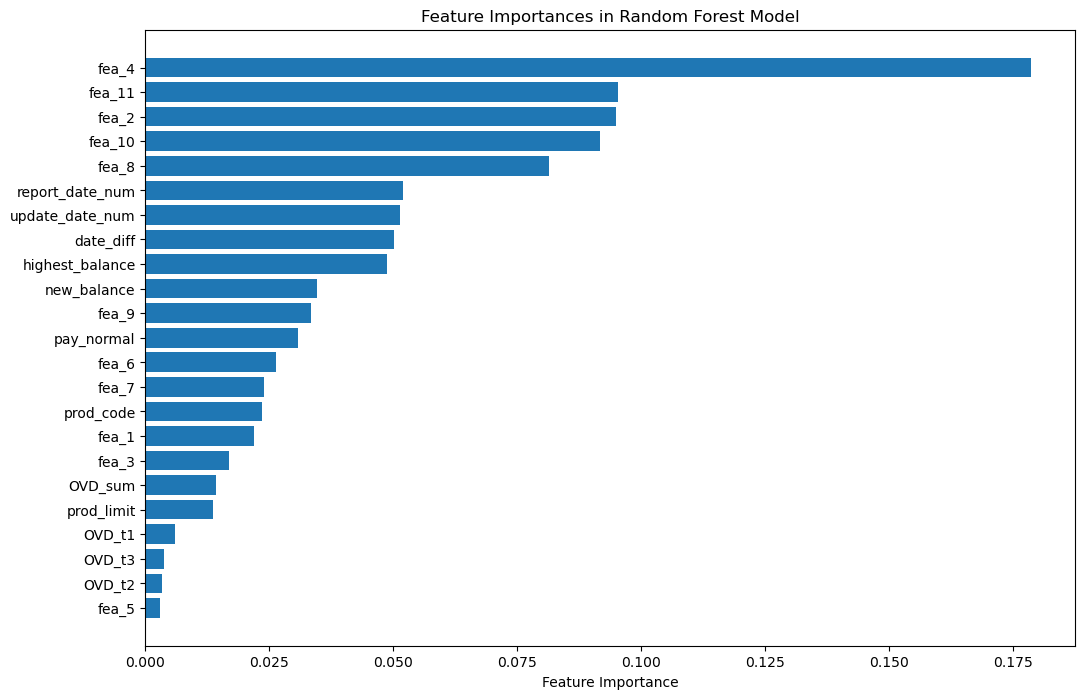


Feature Importances:
             Feature  Importance
12            fea_4    0.178643
19           fea_11    0.095337
10            fea_2    0.094871
18           fea_10    0.091720
16            fea_8    0.081494
22  report_date_num    0.051991
21  update_date_num    0.051350
20        date_diff    0.050200
8   highest_balance    0.048710
7       new_balance    0.034705
17            fea_9    0.033500
4        pay_normal    0.030751
14            fea_6    0.026258
15            fea_7    0.023875
5         prod_code    0.023578
9             fea_1    0.021998
11            fea_3    0.016953
3           OVD_sum    0.014339
6        prod_limit    0.013573
0            OVD_t1    0.005919
2            OVD_t3    0.003750
1            OVD_t2    0.003451
13            fea_5    0.003034


In [99]:
# Extract feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# Print feature importances
print("\nFeature Importances:\n", feature_importance_df)

- Use feature_importances_ from the Random Forest model to understand which features are most impactful.
- This provides a ranking of features based on their contribution to the model’s predictions. Features with higher importance values have more influence on the outcome.
- Bar Plot: Visualizes the importance of each feature, making it easier to see which features are most and least significant.

## Hyperparameter Tuning with Grid Search

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best model
best_rf_model = grid_search.best_estimator_

# Validate the best model on test data
from sklearn.metrics import classification_report, accuracy_score

y_pred_best = best_rf_model.predict(X_test)
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.910995670995671
Confusion Matrix (Best Model):
 [[2054    0]
 [ 221  200]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2054
           1       1.00      0.48      0.64       421

    accuracy                           0.91      2475
   macro avg       0.95      0.74      0.80      2475
weighted avg       0.92      0.91      0.90      2475


Accuracy Score (Best Model): 0.9107070707070707


- Parameter Grid (param_grid): Define a dictionary where keys are hyperparameters to tune (max_depth, min_samples_leaf, criterion), and values are lists of possible values to try.
- GridSearchCV: Instantiate GridSearchCV with the DecisionTreeClassifier model (tree_clf), param_grid, cross-validation (cv=5), and scoring metric (scoring='accuracy').
- Fit Grid Search: Fit GridSearchCV on the training data (X_train, y_train) to find the best combination of hyperparameters.
- Best Parameters and Score: Print the best parameters found (grid_search.best_params_) and the corresponding cross-validation accuracy (grid_search.best_score_).
- Evaluate Optimized Model: Use the best model found (best_tree_clf) to predict on the test data (X_test) and evaluate its accuracy.

## Cross-Validation Techniques

In [101]:
from sklearn.model_selection import cross_val_score

# Cross-validation with the best model
cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5, n_jobs=-1)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.82545455 0.83818182 0.85818182 0.84060606 0.84606061]
Mean CV Score: 0.8416969696969696


- cross_val_score: Use cross_val_score to perform k-fold cross-validation (cv=5 by default) on the optimized model (best_tree_clf) and compute accuracy scores for each fold.

- Cross-validation Scores: Print the cross-validation scores for each fold (cv_scores) and compute the mean accuracy across all folds (cv_scores.mean()).

# Summary

- After preprocessing the Credit Risk Classification dataset, the optimized Random Forest model, with hyperparameters {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, achieved an accuracy of 91.07%.
-  The model's performance was robust, with a high precision for class 1 (1.00) and a balanced recall (0.48), reflecting a trade-off between precision and recall. Feature importance analysis highlighted fea_4, fea_11, and fea_2 as key predictors, providing valuable insights into the factors influencing credit risk.